In [36]:
import pandas as pd
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight') 

In [37]:
df = yf.download('BTC-USD')
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

[*********************100%***********************]  1 of 1 completed


In [38]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-08-21,59014.988281,61834.351562,58823.445312,61175.191406,61175.191406,32731154072
2024-08-22,61168.316406,61408.109375,59815.253906,60381.914062,60381.914062,27625734377
2024-08-23,60380.953125,64947.062500,60372.050781,64094.355469,64094.355469,42530509233


In [39]:
Mon, Tue, Wed, Thu, Fri, Sat, Sun = [], [], [], [], [], [], []

In [40]:
def get_dsr(day, dsr):
    if day == 'Monday':
        Mon.append(float(dsr))
    elif day == 'Tuesday':
        Tue.append(float(dsr))
    elif day == 'Wednesday':
        Wed.append(float(dsr))
    elif day == 'Thursday':
        Thu.append(float(dsr))
    elif day == 'Friday':
        Fri.append(float(dsr))
    elif day == 'Saturday':
        Sat.append(float(dsr))
    elif day == 'Sunday':
        Sun.append(float(dsr))
    else:
        print('Something went wrong')

In [41]:
df['DSR'] = df['Close'].pct_change(1)
df = df[1:]

In [42]:
for i in range(len(df)):
    df_dsr = df['DSR'].iloc[i]
    curr_date = df.index[i]
    df_day_name = calendar.day_name[curr_date.weekday()]
    get_dsr(df_day_name, df_dsr)

In [43]:
def AVG(day):
    if not day:
        return 0
    else:
        return sum(day) / len(day)

In [44]:
df_returns = pd.DataFrame({
    'Average Returns': [
        AVG(Mon), AVG(Tue), AVG(Wed), AVG(Thu), AVG(Fri), AVG(Sat), AVG(Sun)
    ]
}, index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [45]:
print(df_returns.dtypes)

Average Returns    float64
dtype: object


In [46]:
df_returns = df_returns.apply(pd.to_numeric, errors='coerce')

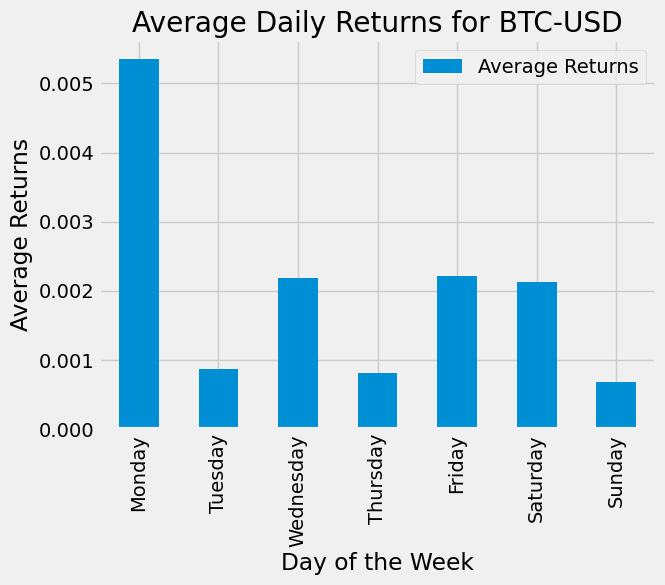

In [47]:
df_returns.plot.bar()
plt.title('Average Daily Returns for BTC-USD')
plt.ylabel('Average Returns')
plt.xlabel('Day of the Week')
plt.show()